In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pandas read pkl flight_data
flight_data_arr = pd.read_pickle('flight_data_arr.pkl')
flight_data_dep = pd.read_pickle('flight_data_dep.pkl')

# Analyse delay by departure dep_delay and where the delay is coming from

(array([1.300000e+01, 6.080000e+02, 7.811100e+04, 3.104330e+06,
        2.787698e+06, 5.508260e+05, 2.219480e+05, 1.192060e+05,
        7.368800e+04, 4.448000e+04, 2.857400e+04, 1.882000e+04,
        1.276300e+04, 8.554000e+03, 5.923000e+03, 4.182000e+03,
        3.017000e+03, 2.119000e+03, 1.558000e+03, 1.180000e+03,
        9.460000e+02, 7.500000e+02, 5.630000e+02, 5.090000e+02,
        4.390000e+02, 4.210000e+02, 3.510000e+02, 3.160000e+02,
        3.090000e+02, 3.030000e+02, 2.690000e+02, 2.810000e+02,
        2.900000e+02, 3.070000e+02, 3.130000e+02, 2.840000e+02,
        2.740000e+02, 2.610000e+02, 2.210000e+02, 1.780000e+02,
        1.610000e+02, 1.420000e+02, 1.440000e+02, 1.280000e+02,
        1.070000e+02, 8.600000e+01, 8.100000e+01, 6.700000e+01,
        4.900000e+01, 3.700000e+01, 2.900000e+01, 3.200000e+01,
        3.200000e+01, 2.800000e+01, 1.900000e+01, 2.100000e+01,
        8.000000e+00, 1.300000e+01, 8.000000e+00, 6.000000e+00,
        4.000000e+00, 0.000000e+00, 3.00

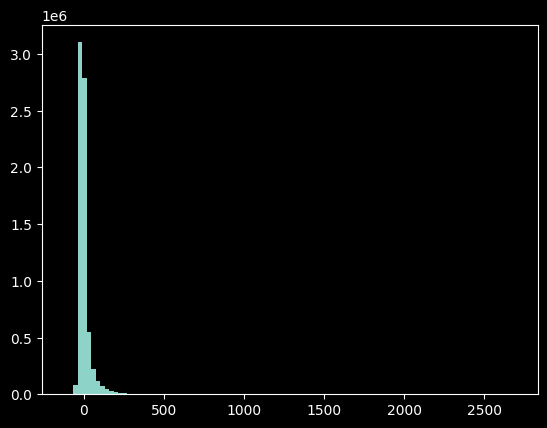

In [3]:
# plot distribution of DEP_DELAY
plt.hist(flight_data_arr['ARR_DELAY'], bins=100)

In [4]:
print(f"The mean delay was {np.round(np.mean(flight_data_arr['ARR_DELAY']), 2)} minutes")

The mean delay was 5.05 minutes


In [5]:
print(f"The mean delay was {np.round(np.mean(flight_data_arr['ARR_DELAY']), 2)} minutes")

The mean delay was 5.05 minutes


<AxesSubplot:>

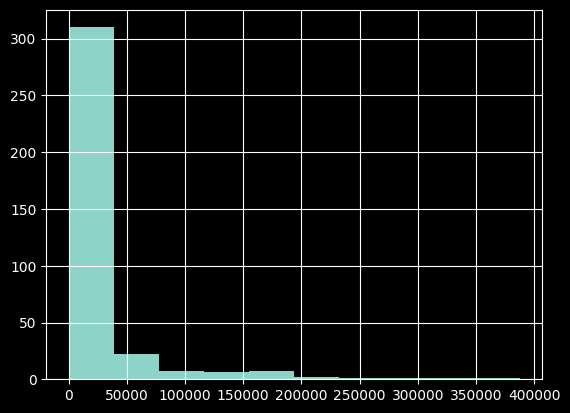

In [6]:
# group by dest and count
flight_data_arr.groupby('DEST')['DEST'].count().sort_values(ascending=False).hist()

# Testszenario 1

In [7]:
# keep only dest with more than 10000 flights
flight_data_arr_reduce_test_1 = flight_data_arr[flight_data_arr['DEST'].isin(flight_data_arr.groupby('DEST')['DEST'].count().sort_values(ascending=True).head(200).index)]

In [8]:
flight_data_arr_reduce_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266854 entries, 5054225 to 7094200
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ARR_DATETIME         266854 non-null  datetime64[ns]
 1   ARR_DELAY            265750 non-null  float64       
 2   DEST                 266854 non-null  object        
 3   CRS_ARR_TIME         266854 non-null  object        
 4   ARR_TIME             266854 non-null  object        
 5   WHEELS_ON            266854 non-null  float64       
 6   ACTUAL_ARR_DATETIME  266854 non-null  datetime64[ns]
 7   CRS_ELAPSED_TIME     266854 non-null  float64       
 8   ACTUAL_ELAPSED_TIME  265965 non-null  float64       
 9   AIR_TIME             265965 non-null  float64       
 10  DISTANCE             266854 non-null  float64       
 11  code_dest            266854 non-null  object        
 12  country_id_dest      266854 non-null  object        
 13  locatio

In [9]:
# subset with only arr_datetime and arr_delay
flight_data_arr_reduce_arr_delay_test_1 = flight_data_arr_reduce_test_1[['ARR_DATETIME', 'ARR_DELAY', 'DEST']]

In [10]:
flight_data_arr_reduce_arr_delay_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266854 entries, 5054225 to 7094200
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ARR_DATETIME  266854 non-null  datetime64[ns]
 1   ARR_DELAY     265750 non-null  float64       
 2   DEST          266854 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.1+ MB


In [11]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(flight_data_arr_reduce_arr_delay_test_1, x=flight_data_arr_reduce_arr_delay_test_1.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 1 svg)', render_mode='svg')
fig.show(renderer="browser")
fig.write_html("test_1_svg_line.html")

In [12]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.scatter(flight_data_arr_reduce_arr_delay_test_1, x=flight_data_arr_reduce_arr_delay_test_1.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 1 svg)', render_mode='svg')
fig.show(renderer="browser")
fig.write_html("test_1_svg_scatter.html")

In [13]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(flight_data_arr_reduce_arr_delay_test_1, x=flight_data_arr_reduce_arr_delay_test_1.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 1 webgl)', render_mode='webgl')
fig.show(renderer="browser")
fig.write_html("test_1_webgl_line.html")

In [14]:
#df = px.data.gapminder().query("country=='Canada'")ARR_DELAY
fig = px.scatter(flight_data_arr_reduce_arr_delay_test_1, x=flight_data_arr_reduce_arr_delay_test_1.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 1 webgl)', render_mode='webgl')
fig.show(renderer="browser")
fig.write_html("test_1_webgl_scatter.html")

# Testszenario 2

In [15]:
# keep only dest with more than 10000 flights
flight_data_arr_reduce_test_2 = flight_data_arr[flight_data_arr['DEST'].isin(flight_data_arr.groupby('DEST')['DEST'].count().sort_values(ascending=True).head(250).index)]

In [16]:
flight_data_arr_reduce_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545158 entries, 1850906 to 7094200
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ARR_DATETIME         545158 non-null  datetime64[ns]
 1   ARR_DELAY            543109 non-null  float64       
 2   DEST                 545158 non-null  object        
 3   CRS_ARR_TIME         545158 non-null  object        
 4   ARR_TIME             545158 non-null  object        
 5   WHEELS_ON            545158 non-null  float64       
 6   ACTUAL_ARR_DATETIME  545158 non-null  datetime64[ns]
 7   CRS_ELAPSED_TIME     545158 non-null  float64       
 8   ACTUAL_ELAPSED_TIME  543506 non-null  float64       
 9   AIR_TIME             543506 non-null  float64       
 10  DISTANCE             545158 non-null  float64       
 11  code_dest            545158 non-null  object        
 12  country_id_dest      545158 non-null  object        
 13  locatio

In [17]:
# subset with only arr_datetime and arr_delay
flight_data_arr_reduce_arr_delay_test_2 = flight_data_arr_reduce_test_2[['ARR_DATETIME', 'ARR_DELAY']]

In [18]:
flight_data_arr_reduce_arr_delay_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545158 entries, 1850906 to 7094200
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ARR_DATETIME  545158 non-null  datetime64[ns]
 1   ARR_DELAY     543109 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.5 MB


In [19]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(flight_data_arr_reduce_arr_delay_test_2, x=flight_data_arr_reduce_arr_delay_test_2.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 2 svg)', render_mode='svg')
fig.show(renderer="browser")
fig.write_html("test_2_svg_line.html")

In [20]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.scatter(flight_data_arr_reduce_arr_delay_test_2, x=flight_data_arr_reduce_arr_delay_test_2.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 2 svg)', render_mode='svg')
fig.show(renderer="browser")
fig.write_html("test_2_svg_scatter.html")

In [21]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(flight_data_arr_reduce_arr_delay_test_2, x=flight_data_arr_reduce_arr_delay_test_2.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 2 webgl)', render_mode='webgl')
fig.show(renderer="browser")
fig.write_html("test_2_webgl_line.html")

In [22]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.scatter(flight_data_arr_reduce_arr_delay_test_2, x=flight_data_arr_reduce_arr_delay_test_2.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 2 webgl)', render_mode='webgl')
fig.show(renderer="browser")
fig.write_html("test_2_webgl_scatter.html")

KeyboardInterrupt: 

# Testszenario 3

In [ ]:
# keep only dest with more than 10000 flights
flight_data_arr_reduce_test_3 = flight_data_arr[flight_data_arr['DEST'].isin(flight_data_arr.groupby('DEST')['DEST'].count().sort_values(ascending=True).head(300).index)]

In [ ]:
flight_data_arr_reduce_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274928 entries, 732612 to 7094200
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   ARR_DATETIME         1274928 non-null  datetime64[ns]
 1   ARR_DELAY            1271307 non-null  float64       
 2   DEST                 1274928 non-null  object        
 3   CRS_ARR_TIME         1274928 non-null  object        
 4   ARR_TIME             1274928 non-null  object        
 5   WHEELS_ON            1274928 non-null  float64       
 6   ACTUAL_ARR_DATETIME  1274928 non-null  datetime64[ns]
 7   CRS_ELAPSED_TIME     1274927 non-null  float64       
 8   ACTUAL_ELAPSED_TIME  1272106 non-null  float64       
 9   AIR_TIME             1272106 non-null  float64       
 10  DISTANCE             1274928 non-null  float64       
 11  code_dest            1274928 non-null  object        
 12  country_id_dest      1274928 non-null  object      

In [ ]:
# subset with only arr_datetime and arr_delay
flight_data_arr_reduce_arr_delay_test_3 = flight_data_arr_reduce_test_3[['ARR_DATETIME', 'ARR_DELAY']]

In [ ]:
flight_data_arr_reduce_arr_delay_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274928 entries, 732612 to 7094200
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   ARR_DATETIME  1274928 non-null  datetime64[ns]
 1   ARR_DELAY     1271307 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.2 MB


In [ ]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(flight_data_arr_reduce_arr_delay_test_3, x=flight_data_arr_reduce_arr_delay_test_3.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 3 svg)', render_mode='svg')
fig.show(renderer="browser")
fig.write_html("test_3_svg_line.html")

In [ ]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.scatter(flight_data_arr_reduce_arr_delay_test_3, x=flight_data_arr_reduce_arr_delay_test_3.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 3 svg)', render_mode='svg')
fig.show(renderer="browser")
fig.write_html("test_3_svg_scatter.html")

In [ ]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(flight_data_arr_reduce_arr_delay_test_3, x=flight_data_arr_reduce_arr_delay_test_3.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 3 webgl)', render_mode='webgl')
fig.show(renderer="browser")
fig.write_html("test_3_webgl_line.html")

In [ ]:
#df = px.data.gapminder().query("country=='Canada'")
fig = px.scatter(flight_data_arr_reduce_arr_delay_test_3, x=flight_data_arr_reduce_arr_delay_test_3.ARR_DATETIME.sort_values(ascending=True), y="ARR_DELAY", title='Total Delay per Day in 2018 (Testszenario 3 webgl)', render_mode='webgl')
fig.show(renderer="browser")
fig.write_html("test_3_webgl_scatter.html")